# Angle Monitoring in PowSyBl OpenRAO

PowSyBl OpenRAO main purpose is to determine an optimal combination of remedial actions to apply on a power grid in order to remove overloads on every line. This optimization is flow-oriented. However, OpenRAO also provides a **monitoring** module that is able to check **voltage and angle constraints** and activate remedial actions.

In [2]:
#pip install pypowsybl==1.12.0
# set up logging
import logging
logging.getLogger('powsybl').setLevel(logging.DEBUG)
logging.basicConfig(format='%(asctime)s - %(levelname)s - %(message)s')

In [3]:
import pypowsybl as pp
from pypowsybl.rao import Parameters as RaoParameters




2025-08-27 10:04:34,629 - DEBUG - Max heap is 8008 MB


In [4]:
# # Simple case with GlskB45test
# 1) simple cse with topo
#     2) simple case with injection : solves angle cnecs constraints
# 3) micro grid case


In [5]:
# MicroGrid case with GlskB45MicroGridTest

2025-08-27 10:04:34,658 - INFO - Using platform configuration provider classic
2025-08-27 10:04:34,658 - INFO - Platform configuration defined by YAML file /home/bouquettho/.itools/config.yml
2025-08-27 10:04:34,661 - INFO - LocalComputationConfig [localDir=/tmp, availableCore=8]
2025-08-27 10:04:34,663 - INFO - Configuring StAX XMLInputFactory...
2025-08-27 10:04:34,664 - INFO - Some properties may not be supported by your implementation.
2025-08-27 10:04:34,665 - INFO - This may not be a problem because some are overlapping.
2025-08-27 10:04:34,666 - INFO - - Property unsupported by StAX implementation: http://javax.xml.XMLConstants/property/accessExternalStylesheet
2025-08-27 10:04:34,667 - INFO - - Property unsupported by StAX implementation: http://javax.xml.XMLConstants/feature/secure-processing
2025-08-27 10:04:34,672 - DEBUG - XIIDM import done in 3 ms
2025-08-27 10:04:34,673 - INFO - Loading component library from /DefaultLibrary...
2025-08-27 10:04:34,679 - DEBUG - Reading su

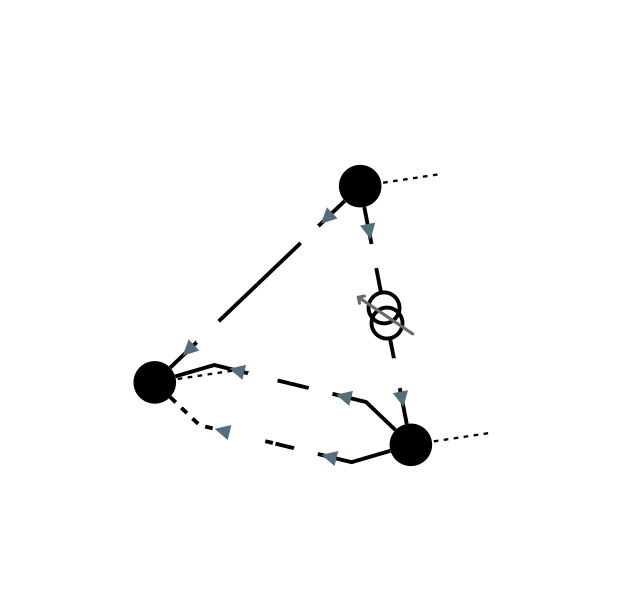

In [6]:
network =  pp.network.load("./data/rao/angle_monitoring/network.xiidm")
network.get_network_area_diagram()

In [7]:
parameters = RaoParameters()
parameters.load_from_file_source("./data/rao/rao_parameters.json")
load_flow_parameters = parameters.loadflow_and_sensitivity_parameters.sensitivity_parameters.load_flow_parameters

In [8]:
rao_runner = pp.rao.create_rao()
rao_runner.set_crac_file_source(network, "./data/rao/angle_monitoring/angle_monitoring_simple_case_with_injectionRa.json")

2025-08-27 10:04:34,724 - INFO - CIM GLSK importer could import this document.


In [9]:
rao_result = rao_runner.run(network, parameters)
rao_result.get_flow_cnec_results()

2025-08-27 10:04:34,732 - ERROR - Multi (GSK+LSK) shift keys not supported yet...
com.powsybl.glsk.commons.GlskException: Multi (GSK+LSK) shift keys not supported yet...
	at com.powsybl.glsk.api.util.converters.GlskPointLinearGlskConverter.convert(GlskPointLinearGlskConverter.java:56)
	at com.powsybl.glsk.api.util.ZonalDataFromGlskDocument.addLinearDataFromList(ZonalDataFromGlskDocument.java:56)
	at com.powsybl.glsk.api.util.ZonalDataFromGlskDocument.<init>(ZonalDataFromGlskDocument.java:48)
	at com.powsybl.glsk.api.GlskDocument.getZonalGlsks(GlskDocument.java:41)
	at com.powsybl.python.rao.RaoContext.run(RaoContext.java:51)
	at com.powsybl.python.rao.RaoCFunctions.lambda$runRao$6(RaoCFunctions.java:136)
	at com.powsybl.python.commons.Util.doCatch(Util.java:144)
	at com.powsybl.python.rao.RaoCFunctions.runRao(RaoCFunctions.java:132)



PyPowsyblError: Multi (GSK+LSK) shift keys not supported yet...

In [ ]:
# rao_runner = pp.rao.create_rao()
# rao_runner.set_crac_file_source(network, "./data/rao/angle_monitoring/angle_monitoring_simple_case_with_injectionRa.json")
rao_runner.set_glsk_file_source(network, "./data/rao/angle_monitoring/GlskB45test.xml")
result_with_angle_monitoring = rao_runner.run_angle_monitoring(network, rao_result, load_flow_parameters, "OpenLoadFlow")
result_with_angle_monitoring.get_angle_cnec_results()

2025-08-27 10:02:55,929 - INFO - CIM GLSK importer could import this document.
2025-08-27 10:02:55,932 - INFO - ----- ANGLE monitoring [start]
2025-08-27 10:02:55,932 - INFO - -- 'ANGLE' Monitoring at state 'preventive' [start]
2025-08-27 10:02:55,933 - INFO - Load-flow computation [start]


In [ ]:
# Simple case
# import inputs
network =  pp.network.load("./data/rao/angle_monitoring/network.xiidm")
rao_runner = pp.rao.create_rao()
parameters = RaoParameters()
parameters.load_from_file_source("./data/rao/rao_parameters.json")
load_flow_parameters = parameters.loadflow_and_sensitivity_parameters.sensitivity_parameters.load_flow_parameters
rao_runner.set_crac_file_source(network, "./data/rao/angle_monitoring/angle_monitoring_simple_case_with_injectionRa.json")
# rao_runner.set_glsk_file_source(network, "./data/rao/angle_monitoring/GlskB45test.xml")  
print(rao_runner._pypowsybl.get_crac(rao_runner._handle))
rao_result = rao_runner.run(network, parameters)
rao_result
# result_with_angle_monitoring = rao_runner.run_angle_monitoring(network, rao_result, load_flow_parameters)

AttributeError: 'Rao' object has no attribute '_pypowsybl'

In [ ]:

# import inputs
network =  pp.network.load("./data/rao/rao_network.uct")
rao_runner = pp.rao.create_rao()
parameters = RaoParameters()
parameters.load_from_file_source("./data/rao/rao_parameters.json")
load_flow_parameters = parameters.loadflow_and_sensitivity_parameters.sensitivity_parameters.load_flow_parameters
rao_runner.set_crac_file_source(network, "./data/rao/rao_crac.json")
rao_runner.set_glsk_file_source(network, "./data/rao/rao_glsk.xml")  
rao_result = rao_runner.run(network, parameters)
result_with_angle_monitoring = rao_runner.run_angle_monitoring(network, rao_result, load_flow_parameters)
result_with_voltage_monitoring = rao_runner.run_angle_monitoring(network, rao_result, load_flow_parameters)

2025-08-26 09:39:54,801 - ERROR - File ./data/rao/rao_network.uct does not exist
com.powsybl.commons.PowsyblException: File ./data/rao/rao_network.uct does not exist
	at com.powsybl.commons.datasource.DataSource.fromPath(DataSource.java:38)
	at com.powsybl.iidm.network.Network.read(Network.java:125)
	at com.powsybl.iidm.network.Network.read(Network.java:135)
	at com.powsybl.python.network.NetworkCFunctions.lambda$loadNetwork$9(NetworkCFunctions.java:199)
	at com.powsybl.python.commons.Util.doCatch(Util.java:144)
	at com.powsybl.python.network.NetworkCFunctions.loadNetwork(NetworkCFunctions.java:191)



PyPowsyblError: File ./data/rao/rao_network.uct does not exist

Launch monitoring

: 

In [ ]:
# prepare inputs
n12 = pp.network.load('./data/rao/12_node_network.uct')
rao_runner = pp.rao.create_rao()
rao_runner.run_angle_monitoring(network, crac)



rao_runner.set_crac_file_source(n12, "./data/rao/N_case_crac.json")
rao_parameters = RaoParameters()
rao_parameters.load_from_file_source("./data/rao/rao_parameters.json")
# set up logging
import logging
logging.getLogger('powsybl').setLevel(logging.INFO)
logging.basicConfig(format='%(asctime)s - %(levelname)s - %(message)s')
#run rao
raoResult = rao_runner.run(n12, rao_parameters)
result_json = raoResult.to_json()

2025-08-26 09:41:21,290 - ERROR - BBE1AA1  BBE2AA1  1 - Real line resistance cannot be negative (0.0 ohm)
2025-08-26 09:41:21,291 - ERROR - BBE1AA1  BBE3AA1  1 - Real line resistance cannot be negative (0.0 ohm)
2025-08-26 09:41:21,292 - ERROR - FFR1AA1  FFR2AA1  1 - Real line resistance cannot be negative (0.0 ohm)
2025-08-26 09:41:21,293 - ERROR - FFR1AA1  FFR3AA1  1 - Real line resistance cannot be negative (0.0 ohm)
2025-08-26 09:41:21,293 - ERROR - FFR2AA1  FFR3AA1  1 - Real line resistance cannot be negative (0.0 ohm)
2025-08-26 09:41:21,294 - ERROR - DDE1AA1  DDE2AA1  1 - Real line resistance cannot be negative (0.0 ohm)
2025-08-26 09:41:21,294 - ERROR - DDE1AA1  DDE3AA1  1 - Real line resistance cannot be negative (0.0 ohm)
2025-08-26 09:41:21,295 - ERROR - DDE2AA1  DDE3AA1  1 - Real line resistance cannot be negative (0.0 ohm)
2025-08-26 09:41:21,295 - ERROR - NNL1AA1  NNL2AA1  1 - Real line resistance cannot be negative (0.0 ohm)
2025-08-26 09:41:21,296 - ERROR - NNL1AA1  NNL

NameError: name 'crac' is not defined

: 

: 

: 